In [5]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [6]:
df= pd.read_csv("datasets/Social_Network_Ads.csv")

In [7]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


##### SEperate the I/O variables

In [9]:
x = df[["Age","EstimatedSalary"]]
y = df["Purchased"]

In [10]:
x.shape

(400, 2)

In [12]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [16]:
set(y)    #use to check what values are there.

{0, 1}

In [17]:
np.unique(y)   #use to check what values are there.

array([0, 1], dtype=int64)

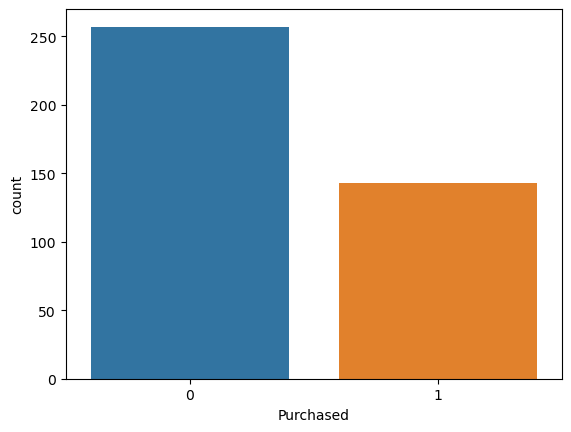

In [21]:
sns.countplot(x=y);     #shows the balance of counts of the respective classes.

In [22]:
y.value_counts()      #shows exact numbers

Purchased
0    257
1    143
Name: count, dtype: int64

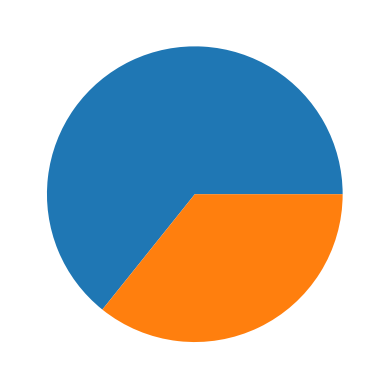

In [25]:
plt.pie(y.value_counts());

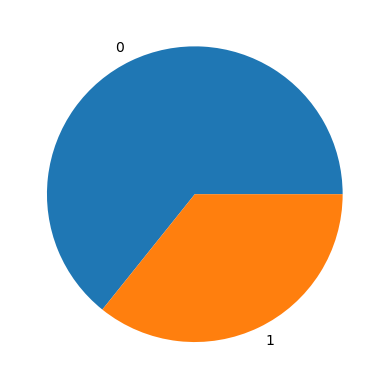

In [27]:
plt.pie(y.value_counts() , labels =y.value_counts().index);


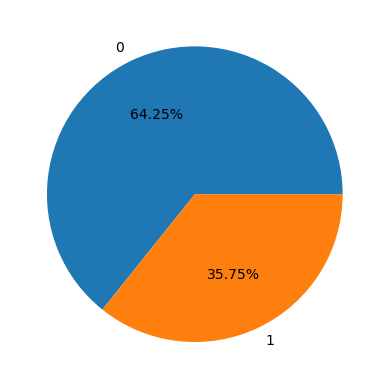

In [29]:
plt.pie(y.value_counts() , labels =y.value_counts().index , autopct ="%2.2f%%");

In [32]:
g= df["Gender"]    #to show Genderin pie
g.value_counts()


Gender
Female    204
Male      196
Name: count, dtype: int64

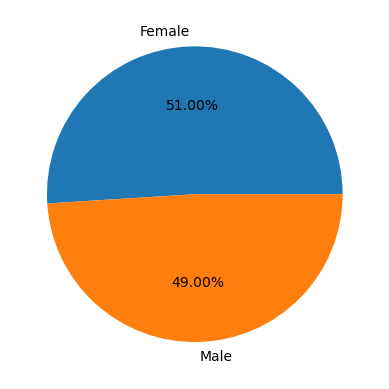

In [33]:
plt.pie(g.value_counts() , labels =g.value_counts().index , autopct ="%2.2f%%");

{'whiskers': [<matplotlib.lines.Line2D at 0x24d89360ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d887d9c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d84d86550>],
 'medians': [<matplotlib.lines.Line2D at 0x24d887db950>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d887db190>],
 'means': []}

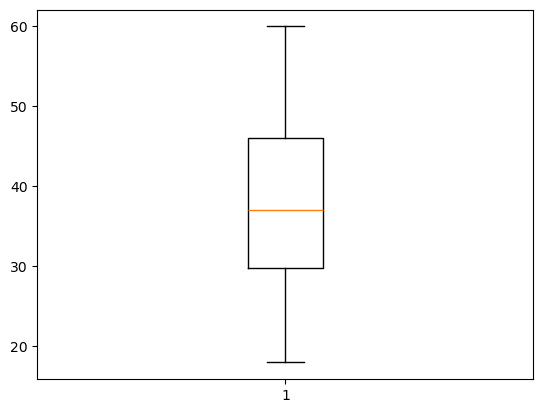

In [35]:
plt.boxplot(df["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x24d89428d50>,
 'caps': [<matplotlib.lines.Line2D at 0x24d8942a090>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d89428450>],
 'medians': [<matplotlib.lines.Line2D at 0x24d8942b210>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d8942ba50>],
 'means': []}

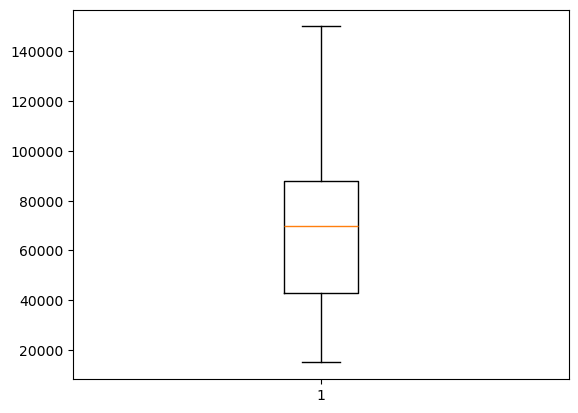

In [36]:
plt.boxplot(df["EstimatedSalary"])

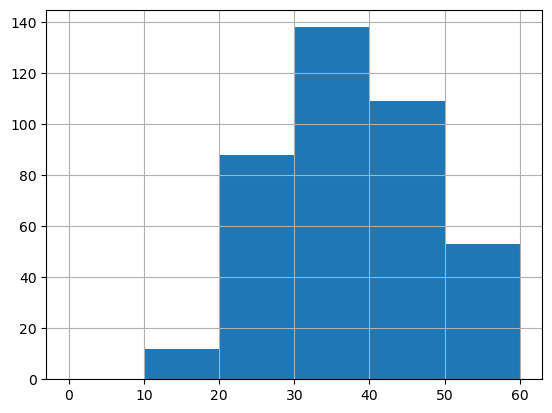

In [39]:
plt.xticks(range(0,61,10))
plt.grid()
plt.hist(df["Age"],range(0,61,10));

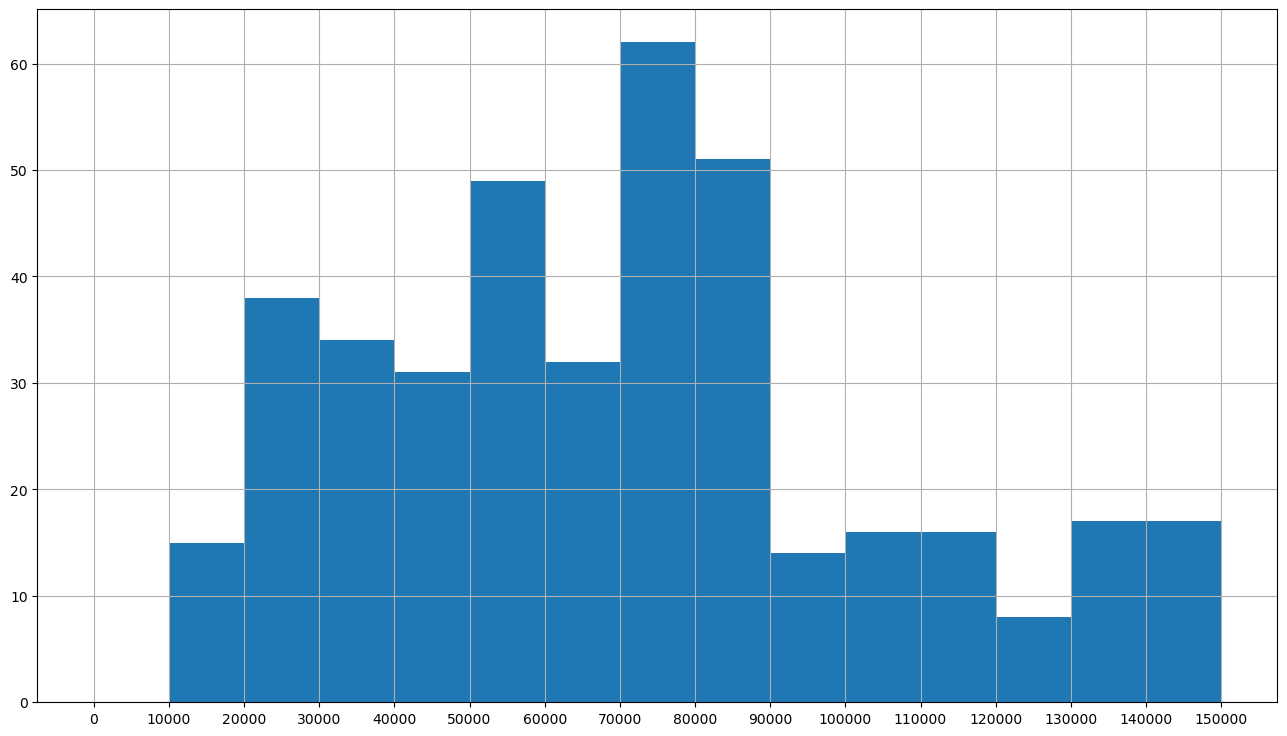

In [41]:
plt.figure(figsize=(16,9))
plt.xticks(range(0,150001,10000))
plt.grid()
plt.hist(df["EstimatedSalary"],range(0,150001,10000));

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

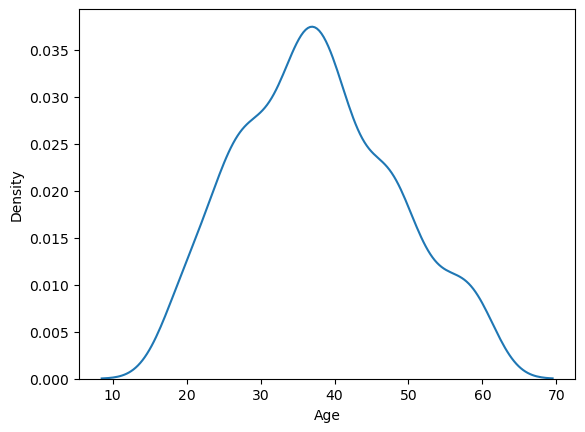

In [43]:
sns.kdeplot(df["Age"])


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

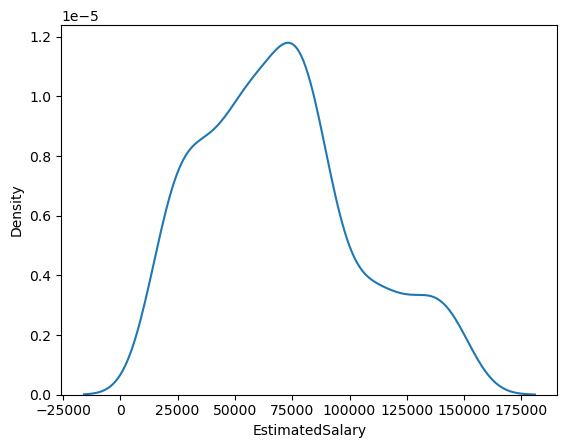

In [44]:
sns.kdeplot(df["EstimatedSalary"])


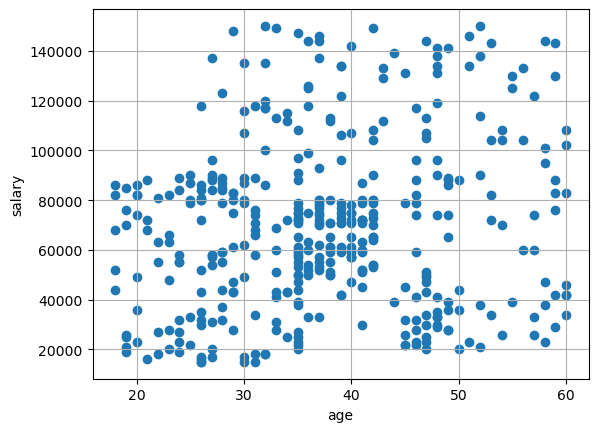

In [45]:
plt.xlabel("age")
plt.ylabel("salary")
plt.grid()
plt.scatter(x["Age"],x["EstimatedSalary"])

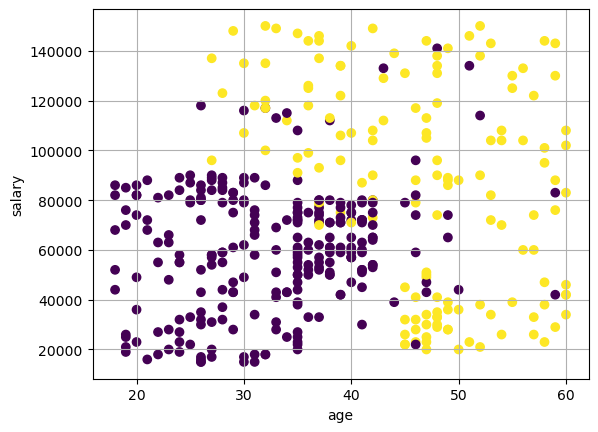

In [46]:
plt.xlabel("age")
plt.ylabel("salary")
plt.grid()
plt.scatter(x["Age"],x["EstimatedSalary"],c=y)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


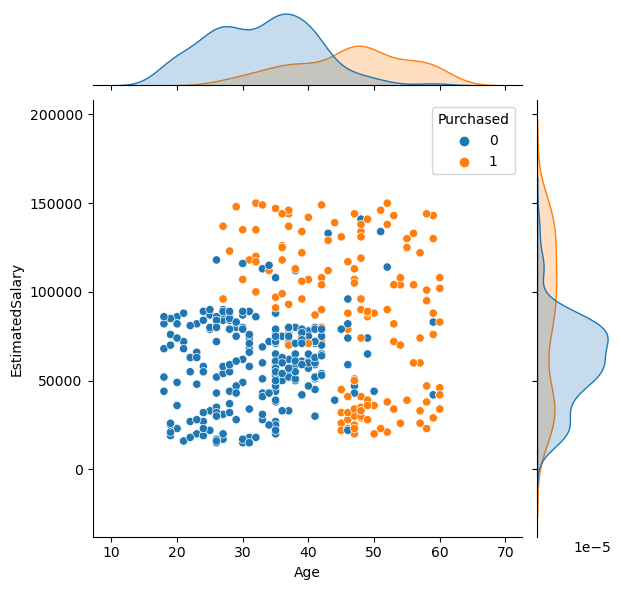

In [47]:
sns.jointplot(x= "Age",y="EstimatedSalary" , data = df , hue = "Purchased")

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [62]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


##### Cross Validation

In [63]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train ,y_test =train_test_split(x_scaled ,y,random_state = 0)


In [64]:
x_train 

array([[0.61904762, 0.17777778],
       [0.33333333, 0.77777778],
       [0.47619048, 0.25925926],
       [0.33333333, 0.88888889],
       [0.80952381, 0.04444444],
       [0.83333333, 0.65925926],
       [0.5       , 0.2       ],
       [0.47619048, 0.34074074],
       [0.42857143, 0.25925926],
       [0.42857143, 0.35555556],
       [0.4047619 , 0.07407407],
       [0.4047619 , 0.25925926],
       [0.57142857, 0.42962963],
       [0.69047619, 0.25185185],
       [0.97619048, 0.1037037 ],
       [0.73809524, 0.37037037],
       [0.64285714, 0.85925926],
       [0.30952381, 0.54814815],
       [0.66666667, 0.4962963 ],
       [0.69047619, 0.26666667],
       [0.19047619, 0.        ],
       [1.        , 0.64444444],
       [0.47619048, 0.71851852],
       [0.52380952, 0.68148148],
       [0.57142857, 0.28148148],
       [0.4047619 , 0.32592593],
       [0.71428571, 0.19259259],
       [0.71428571, 0.88148148],
       [0.47619048, 0.72592593],
       [0.26190476, 0.98518519],
       [0.

In [65]:
x_train.shape

(300, 2)

In [66]:
x_test.shape

(100, 2)

##### Build the model

In [67]:
from sklearn.linear_model import LogisticRegression
classifier =  LogisticRegression()

In [68]:
#train the algorithm

classifier.fit(x_train,y_train)

LogisticRegression()

##### predict on unseen data

In [69]:
y_pred = classifier.predict(x_test)

In [70]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [71]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [72]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

##### Performance Evaluation

In [76]:
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay

In [77]:
print(confusion_matrix(y_test,y_pred))

[[67  1]
 [10 22]]


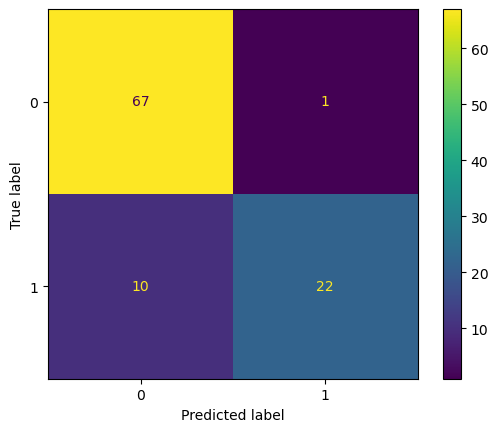

In [78]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [79]:
accuracy_score(y_test,y_pred)         #find accuracy.

0.89

In [81]:
cm=confusion_matrix(y_test,y_pred)

In [82]:
cm.diagonal().sum()/cm.sum()         #by using farmula.

0.89

In [85]:
#to print classification report.

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [86]:
#recall-0/accuracy of class 0 /sensitivity of algorithm
r0 =67/68
r0

0.9852941176470589

In [87]:
#recall-1/accuracy of class 1 /specificity of algorithm
r1 =22/32
r1

0.6875

In [88]:
#precision-0 / positive predictive value
p0=67/77
p0

0.8701298701298701

In [89]:
#precision-1 / Negative predictive value
p1=22/23
p1

0.9565217391304348

In [92]:
# f1-score-0 

2 * p0 * r0 / (p0 + r0 )


0.9241379310344828

In [93]:
# f1-score-1

2 * p1 * r1 / (p1 + r1 )

0.8

In [94]:
classifier.predict_proba(x_test)

array([[0.79225834, 0.20774166],
       [0.75067874, 0.24932126],
       [0.72745429, 0.27254571],
       [0.8159242 , 0.1840758 ],
       [0.81025799, 0.18974201],
       [0.95014473, 0.04985527],
       [0.92927087, 0.07072913],
       [0.39370124, 0.60629876],
       [0.95662616, 0.04337384],
       [0.54623349, 0.45376651],
       [0.88624081, 0.11375919],
       [0.89780651, 0.10219349],
       [0.7548652 , 0.2451348 ],
       [0.61732595, 0.38267405],
       [0.92568557, 0.07431443],
       [0.63220622, 0.36779378],
       [0.67066218, 0.32933782],
       [0.93447243, 0.06552757],
       [0.08457049, 0.91542951],
       [0.87847026, 0.12152974],
       [0.81877656, 0.18122344],
       [0.15276153, 0.84723847],
       [0.67567934, 0.32432066],
       [0.27289303, 0.72710697],
       [0.96313902, 0.03686098],
       [0.13128108, 0.86871892],
       [0.82800591, 0.17199409],
       [0.83014568, 0.16985432],
       [0.72970907, 0.27029093],
       [0.75480803, 0.24519197],
       [0.

##### Prediction on unseen data

In [96]:
new = np.array([[23,45000],[54,148000],[37,63000]])

In [97]:
new

array([[    23,  45000],
       [    54, 148000],
       [    37,  63000]])

In [101]:
classifier.predict(new)     #seen only 1 category....so we have to normalized using scaling.

array([1, 1, 1], dtype=int64)

In [102]:
new_scaled = scaler.transform(new)
new_scaled

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.11904762, 0.22222222],
       [0.85714286, 0.98518519],
       [0.45238095, 0.35555556]])

In [103]:
classifier.predict(new_scaled)

array([0, 1, 0], dtype=int64)

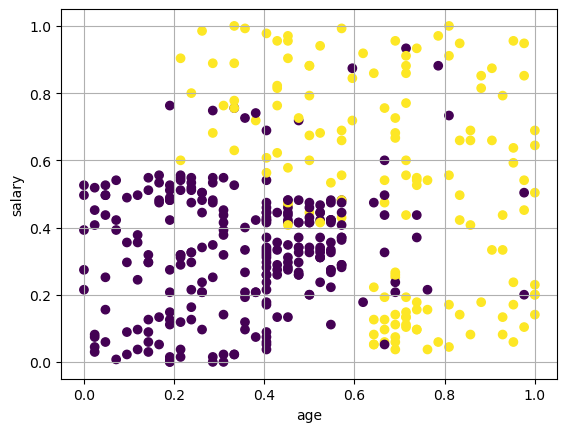

In [104]:
plt.xlabel("age")
plt.ylabel("salary")
plt.grid()
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y)

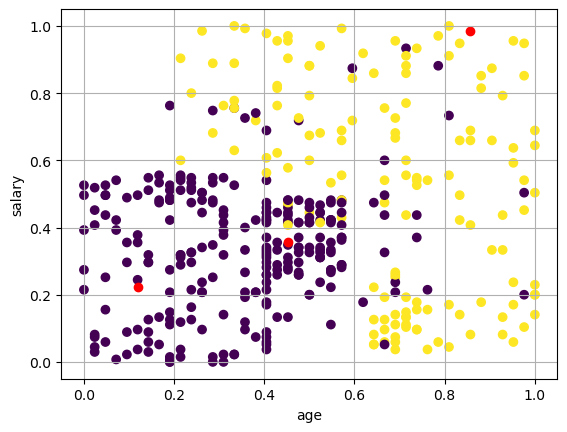

In [106]:
plt.xlabel("age")
plt.ylabel("salary")
plt.grid()
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y)
plt.scatter(new_scaled[:,0],new_scaled[:,1],color="red")

In [107]:
classifier.predict_proba(new_scaled)

array([[0.94995459, 0.05004541],
       [0.06890179, 0.93109821],
       [0.72598556, 0.27401444]])